In [5]:
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [2]:
# Load the dataset
data = pd.read_csv("../data/Employee_data.csv")

In [25]:
# Inspect data
print("Dataset Shape:", data.shape)
print("\nFirst Five Rows:")
print(data.head())


Dataset Shape: (1470, 35)

First Five Rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfacti

In [26]:
# Checking for missing values and data types
print("\nPrint Data Info:")
print(data.info)


Print Data Info:
<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  E

In [27]:
# Unique value count for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_features:
    print(f"{col}: {data[col].nunique()} unique values")


Unique Values in Categorical Features:
Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
Over18: 1 unique values
OverTime: 2 unique values


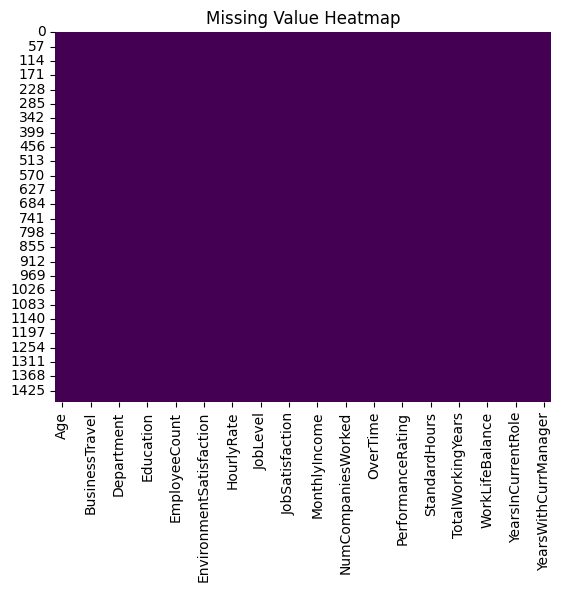

In [28]:
# Visualize missing values, if any
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [29]:
# Confirm no nulls
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
# Drop irrelevant columns
data.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], inplace=True)

In [32]:
# Encode Attrition
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Feature Engineering: Test Features
# The following section includes experimental feature engineering techniques to evaluate their impact on model performance. 
# These features are subject to refinement or removal based on the outcomes of the analysis.

First five rows of Role Stability feature:
   YearsInCurrentRole  YearsAtCompany  RoleStability
0                   4               6       0.571429
1                   7              10       0.636364
2                   0               0       0.000000
3                   7               8       0.777778
4                   2               2       0.666667


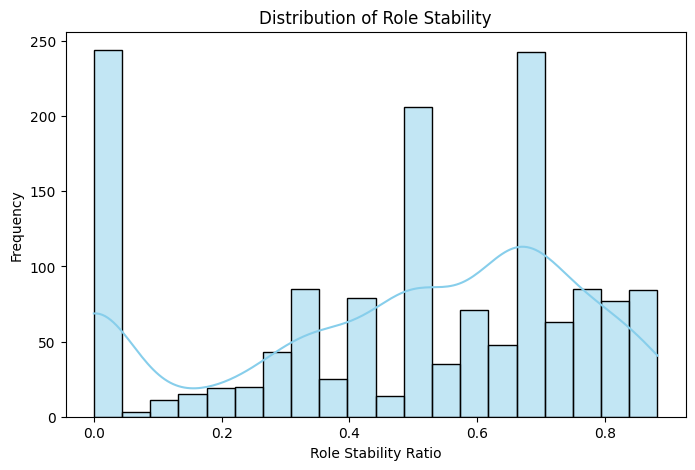

In [3]:
# Feature Engineering: Role Stability
# ------------------------------------
# Role Stability = YearsInCurrentRole / (YearsAtCompany + 1)
# Rationale:
# - Measures role consistency and stability within the company.
# - Low values indicate frequent role changes or short tenure in roles.
# - High values suggest stable and prolonged roles.

data['RoleStability'] = data['YearsInCurrentRole'] / (data['YearsAtCompany'] + 1)

# Inspect feature
print("First five rows of Role Stability feature:")
print(data[['YearsInCurrentRole', 'YearsAtCompany', 'RoleStability']].head())

# Check the distribution of Role Stability
plt.figure(figsize= (8, 5))
sns.histplot(data['RoleStability'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Role Stability')
plt.xlabel('Role Stability Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Analysis: Role Stability
# ---------------------------------
# RoleStability = YearsInCurrentRole / (YearsAtCompany + 1)
# 
# Outcome Summary:
# - The feature captures an employee's role tenure relative to their total time at the company.
# - Observations:
#   - A significant portion of employees have a Role Stability ratio of 0, indicating recent hires or frequent role changes.
#   - Employees with higher stability ratios (above 0.5) are more prevalent, suggesting that role stability could contribute to longer tenure.
#   - A dip near 0.5 suggests potential challenges for employees in this range, warranting further investigation.
# - Potential Insights:
#   - High turnover is likely among employees with low Role Stability, potentially due to dissatisfaction or lack of opportunities for role progression.
#   - High stability ratios might indicate employees in well-suited or stable roles, correlating with better retention.
# 
# Importance:
# - This feature provides a measurable factor to analyze employee retention and attrition patterns.

First five rows of OT_WorkLifeImpact:
   OverTime_Binary  WorkLifeBalance  OT_WorkLifeImpact
0                1                1           0.999990
1                0                3           0.000000
2                1                3           0.333332
3                1                3           0.333332
4                0                3           0.000000


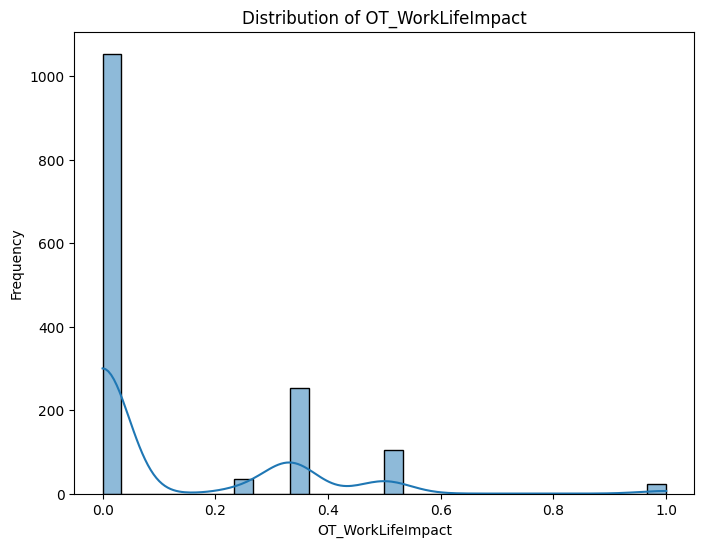

In [8]:
# Feature Engineer: OT_WorkLifeImpact
# ------------------------------------
# OT_WorkLifeImpact = OverTime (binary) / WorkLifeBalance
# Rationale:
# - Overtime can sometimes negatively impact work-life balance, contributing to attrition risk.
# - By combining the OverTime binary with the WorkLifeBalance score,
#   we can create a new feature to access to how much overtime affects and employees work-life balance.
# - Employees working overtime with low work-life balance scores may be at higher risk of attrition.

# Encode OverTime
data['OverTime_Binary'] = data['OverTime'].map({'Yes': 1, 'No': 0})

#Implement
data['OT_WorkLifeImpact'] = data['OverTime_Binary'] / (data['WorkLifeBalance'] + 1e-5)

# Inspect feature
print("First five rows of OT_WorkLifeImpact:")
print(data[['OverTime_Binary', 'WorkLifeBalance', 'OT_WorkLifeImpact']].head())

# Check distribution of OT_WorkLifeBalance
plt.figure(figsize=(8, 6))
sns.histplot(data['OT_WorkLifeImpact'], bins=30, kde=True)
plt.title('Distribution of OT_WorkLifeImpact')
plt.xlabel('OT_WorkLifeImpact')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Analysis: OT_WorkLifeImpact
# ------------------------------------
# OT_WorkLifeImpact = OverTime_Binary / (WorkLifeBalance + 1e-5)
#
# Outcome Summary:
# - This feature captures the strain of overtime relative to an employee's work-life balance.
# - Observations:
#   - The distribution is heavily skewed towards lower values, with most employees experiencing little to no overtime strain.
#   - A smaller subset of employees shows higher values, indicating significant overtime combined with low work-life balance.
#   - A peak at 0 suggests a large group of employees who either do not work overtime or maintain a high work-life balance.
# - Potential Insights:
#   - Employees with OT_WorkLifeImpact values near 1 may experience significant work-life strain, increasing the risk of attrition.
#   - Employees with values closer to 0 likely face minimal work-life conflicts, suggesting lower attrition risk from this factor.
#
# Importance:
# - This feature provides insight into the relationship between overtime and work-life balance.
# - It can help identify employees at risk of burnout and attrition due to overtime-related stress.

First five rows of SeniorityImpact:
   YearsAtCompany  TotalWorkingYears  SeniorityImpact
0               6                  8         0.749999
1              10                 10         0.999999
2               0                  7         0.000000
3               8                  8         0.999999
4               2                  6         0.333333


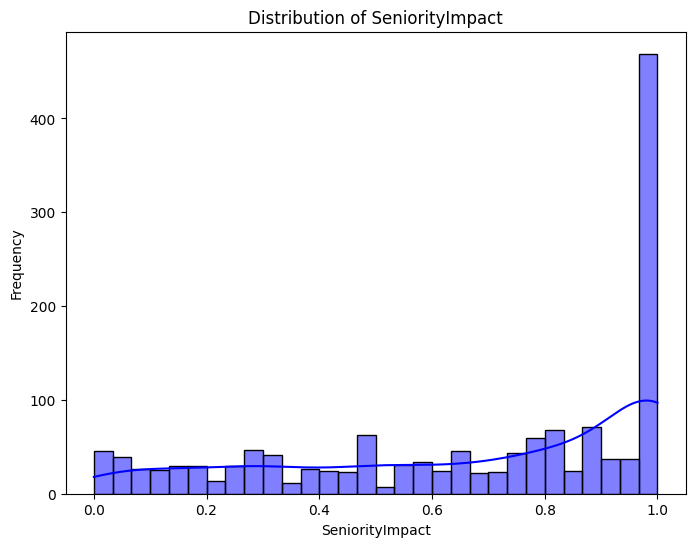

In [10]:
# Feature Engineer: SeniorityImpact
# ---------------------------------
# SeniorityImpact = YearsAtCompany / (TotalWorkingYears + 1e-5)
#
# Rationale:
# - This feature creates the proportion of an employee's total work experience spent at the current company.
# - Higher SeniorityImpact values suggest employees are more committed to the current company.
# - Lower values suggest employees may have had substantial work experience elsewhere, which could affect their retention or career trajectory. 

# Implement
data['SeniorityImpact'] = data['YearsAtCompany'] / (data['TotalWorkingYears'] + 1e-5)

# Inspect feature
print("First five rows of SeniorityImpact:")
print(data[['YearsAtCompany', 'TotalWorkingYears', 'SeniorityImpact']].head())

# Check distribution of SeniorityImpact
plt.figure(figsize=(8, 6))
sns.histplot(data['SeniorityImpact'], bins=30, kde=True, color='blue')
plt.title('Distribution of SeniorityImpact')
plt.xlabel('SeniorityImpact')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Analysis: SeniorityImpact
# ----------------------------------
# SeniorityImpact = YearsAtCompany / (TotalWorkingYears + 1e-5)
# 
# Outcome Summary:
# - The feature measures the proportion of an employee's total work experience spent at the current company.
# - Observations:
#   - High SeniorityImpact values (close to 1) indicate employees who have spent most of their careers with the company.
#   - Low SeniorityImpact values suggest employees with significant prior work experience outside the organization.
#   - The distribution reveals a concentration of employees at low SeniorityImpact values, likely representing individuals with diverse career histories.
# - Potential Insights:
#   - Employees with very low SeniorityImpact may have less attachment to the organization and could have higher attrition risks.
#   - High SeniorityImpact values might correlate with loyalty and long-term retention, as these employees have dedicated most of their careers to the company.
#   - Identifying patterns by department or job level could further refine insights and reveal department-specific trends.
# 
# Importance:
# - This feature helps assess employee retention risk and loyalty by considering the balance between internal tenure and total work experience.

/var/folders/x_/96cwttys05g8wvsm5fxpt6gm0000gn/T/ipykernel_79891/1042973114.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Department', y='SeniorityImpact', palette='Blues')


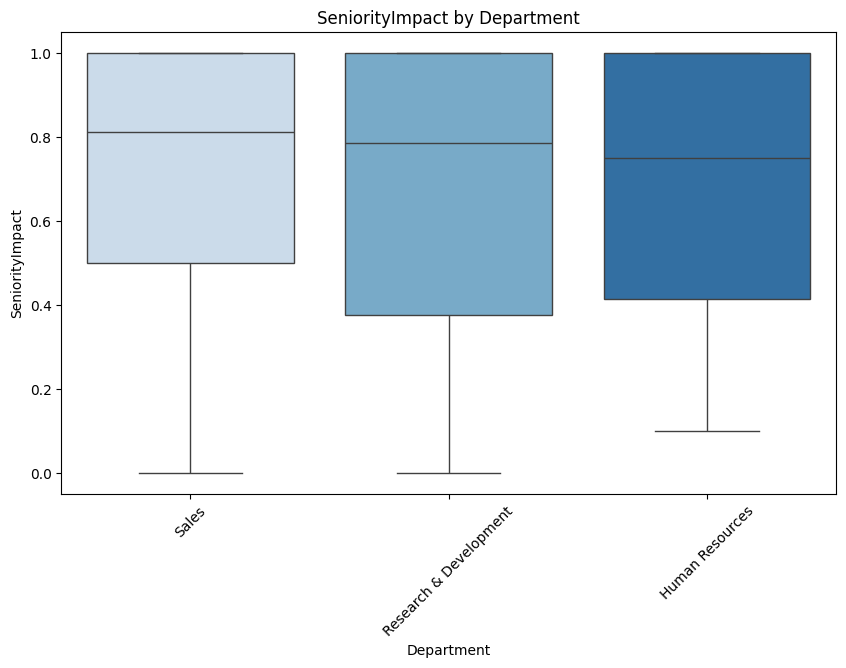

ANOVA Results:
F-statistic: 1.46
P-Value: 0.23144
No statistically significant difference in SeniorityImpact by departments.


In [15]:
# Feature Analysis: SeniorityImpact by Department
# -----------------------------------------------
# Objective:
# - Analyze how SeniorityImpact varies across department.
# - Use ANOVA (Analysis of Variance) to test if the differences in SeniorityImpact between departments is statistically significant.
#
# Rationale:
# - Different departments may have varying levels of employee tenure relative to total work experience.
# - Insights from this analysis can inform department-specific retention strategies.

# Visualize SeniorityImpact by department
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Department', y='SeniorityImpact', palette='Blues')
plt.title('SeniorityImpact by Department')
plt.xlabel('Department')
plt.ylabel('SeniorityImpact')
plt.xticks(rotation=45)
plt.show()

# Perform ANOVA to test difference between departments
from scipy.stats import f_oneway

# Extract SeniorityImpact values by department
anova_results = f_oneway(
    data[data['Department'] == 'Sales']['SeniorityImpact'],
    data[data['Department'] == 'Research & Development']['SeniorityImpact'],
    data[data['Department'] == 'Human Resources']['SeniorityImpact']
)

# Display ANOVA results
print("ANOVA Results:")
print(f"F-statistic: {anova_results.statistic:.2f}")
print(f"P-Value: {anova_results.pvalue:.5f}")

# Interperetation automation
if anova_results.pvalue < 0.05:
    print("The differences in SeniorityImpact across departments are statistically significant.")
else:
    print("No statistically significant difference in SeniorityImpact by departments.")

In [ ]:
# Feature Analysis: SeniorityImpact by Department
# ------------------------------------------------
# Objective:
# - Analyze how SeniorityImpact varies across departments.
# - Use ANOVA to determine if the differences in SeniorityImpact between departments are statistically significant.
#
# Outcome Summary:
# - Boxplot Findings:
#   - The spread of SeniorityImpact is visually similar across departments.
#   - Sales shows slightly more variability, with a broader interquartile range.
#   - Human Resources has the most uniform distribution of SeniorityImpact.
# - ANOVA Results:
#   - F-statistic: 1.46
#   - P-value: 0.23 (greater than 0.05).
#   - Interpretation: There are no statistically significant differences in SeniorityImpact across departments.
# 
# Key Insights:
# - Employees across all departments have comparable tenure relative to their total career experience.
# - The company appears to have consistent tenure trends across departments, with no dramatic disparities.
# - Department-specific retention strategies based on tenure may not be necessary.

First five rows of GrowthMetric:
   YearsSinceLastPromotion  YearsInCurrentRole  GrowthMetric
0                        0                   4      0.000000
1                        1                   7      0.142857
2                        0                   0      0.000000
3                        3                   7      0.428571
4                        2                   2      0.999995


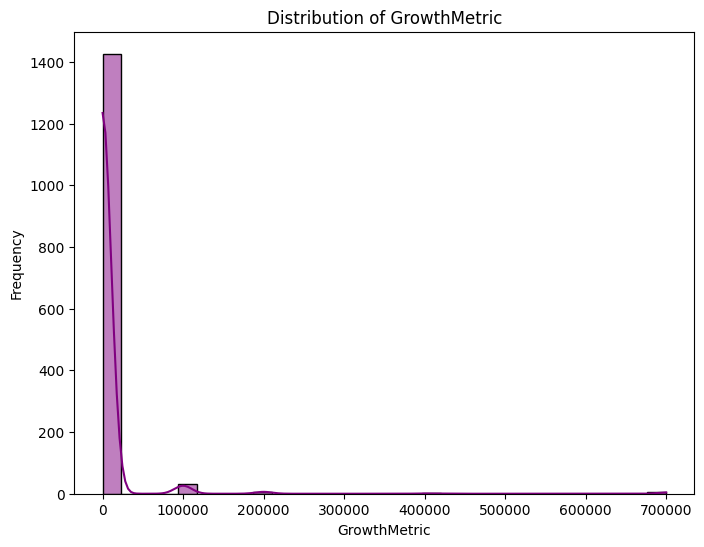

In [ ]:
# Feature Engineering: GrowthMetric
# ----------------------------------
# GrowthMetric = YearsSinceLastPromotion / YearsInCurrentRole + 1e-5)
#
# Rationale:
# - Captures career growth opportunities by analyzing time spent in the current role relative to the time since the last promotion.
# - High values suggest potential career stagnation.
# - Low values suggest recent promotions or shorter tenure in current role.
#
# Implement GrowthMetric
# data['GrowthMetric'] = data['YearsSinceLastPromotion'] / (data['YearsInCurrentRole'] + 1e-5)
#
# Inspect the feature
# print("First five rows of GrowthMetric:")
# print(data[['YearsSinceLastPromotion', 'YearsInCurrentRole', 'GrowthMetric']].head())
#
# Visualize the distribution of GrowthMetric
# plt.figure(figsize=(8, 6))
# sns.histplot(data['GrowthMetric'], bins=30, kde=True, color='purple')
# plt.title('Distribution of GrowthMetric')
# plt.xlabel('GrowthMetric')
# plt.ylabel('Frequency')
# plt.show()
#
# Commented out because dropped due to skew.


In [20]:
# Drop GrowthMetric Feature
# --------------------------
# Rationale:
# - The GrowthMetric feature was dropped due to its highly skewed distribution and potential redundancy.
# - The information contained in YearsInCurrentRole and YearsSinceLastPromotion will be used directly for analysis and modeling instead.
data.drop(columns=['GrowthMetric'], inplace=True)

# Confirm the feature is removed
print("Remaining columns in the dataset:")
print(data.columns)

Remaining columns in the dataset:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'RoleStability', 'SenorityImpact',
       'SeniorityImpact'],
      dtype='object')


First five rows of SatisfactionBalance:
   WorkLifeBalance  JobSatisfaction  SatisfactionBalance
0                1                4                    4
1                3                2                    6
2                3                3                    9
3                3                3                    9
4                3                2                    6


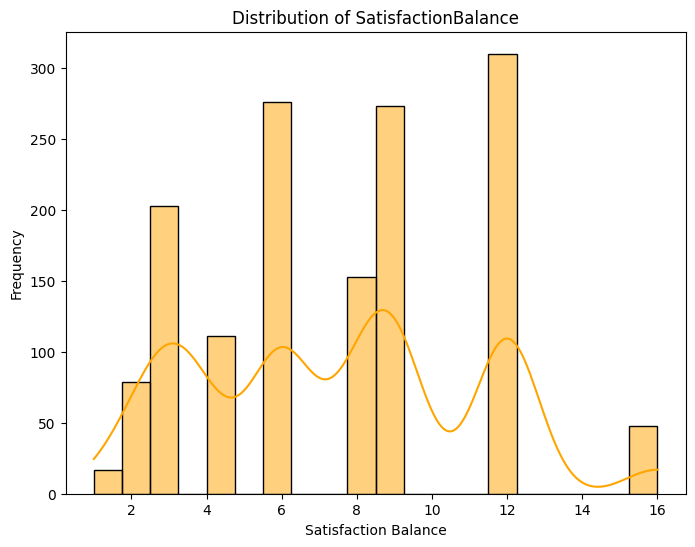

In [29]:
# Feature Engineering: SatisfactionBalance
# -----------------------------------------
# SatisfactionBalance = WorkLifeBalance * JobSatisfaction
#
# Rationale:
# - Combines WorkLifeBalance and JobSatisfaction to assess overall employee well-being.
# - High values indicate satisfied employees with good balance.
# - Low values show employees who might be at risk of attrition.

# Implement feature
data['SatisfactionBalance'] = data['WorkLifeBalance'] * data['JobSatisfaction']

# Inspect the feature
print("First five rows of SatisfactionBalance:")
print(data[['WorkLifeBalance', 'JobSatisfaction', 'SatisfactionBalance']].head())

# Visualize the distribution of SatisfactionBalance
plt.figure(figsize=(8, 6))
sns.histplot(data['SatisfactionBalance'], bins=20, kde=True, color='orange')
plt.title('Distribution of SatisfactionBalance')
plt.xlabel('Satisfaction Balance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Analysis: SatisfactionBalance
# -------------------------------------
# SatisfactionBalance = WorkLifeBalance x JobSatisfaction
#
# Outcome Summary:
# - The SatisfactionBalance feature captures overall employee well-being, combining work-life balance and job satisfaction.
# - Observations:
#   - The feature shows a good variance, ranging from 2 to 16.
#   - Clusters around 4, 6, 9, and 12 likely reflect the categorical nature of the input variables.
#   - Most employees fall in the mid-range of satisfaction, with fewer at the extremes.
#
# Steps to be Taken:
# 1. Analyze Relationship with Attrition:
#    - Use a boxplot to compare SatisfactionBalance for employees who stayed versus those who left.
#    - Calculate the correlation between SatisfactionBalance and Attrition to quantify the relationship.
# Importance:
# - SatisfactionBalance can help identify employees at risk of attrition due to poor well-being.
# - Insights gained can inform retention strategies and department-level interventions.

/var/folders/x_/96cwttys05g8wvsm5fxpt6gm0000gn/T/ipykernel_79891/2145192138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='SatisfactionBalance', palette='coolwarm')


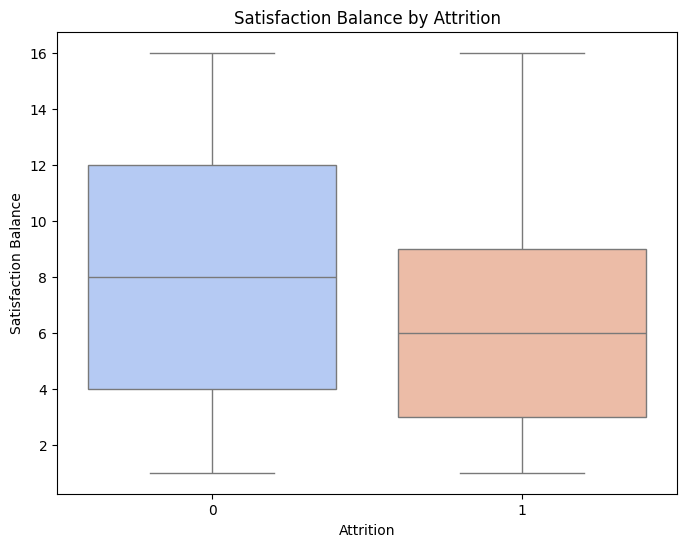

Correlation between SatisfactionBalance and Attrition:
                     SatisfactionBalance  Attrition
SatisfactionBalance             1.000000  -0.119577
Attrition                      -0.119577   1.000000


In [33]:
# Analyze SatisfactionBalance by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='SatisfactionBalance', palette='coolwarm')
plt.title('Satisfaction Balance by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Satisfaction Balance')
plt.show()

# Calculate correlation between SatisfactionBalance and Attrition
correlation = data[['SatisfactionBalance', 'Attrition']].corr()
print("Correlation between SatisfactionBalance and Attrition:")
print(correlation)

In [ ]:
# Feature Analysis: SatisfactionBalance
# --------------------------------------
# SatisfactionBalance = WorkLifeBalance x JobSatisfaction
#
# Outcome Summary:
# - Employees who stayed (Attrition = 0) tend to have higher SatisfactionBalance values (median ~8) 
#   compared to those who left (Attrition = 1, median ~6).
# - The range of SatisfactionBalance is similar for both groups, but employees who suffer from attrition
#   are clustered in the lower SatisfactionBalance range.
#
# Correlation Analysis:
# - Correlation Coefficient: -0.1196
# - A weak negative correlation exists between SatisfactionBalance and Attrition.
#   As SatisfactionBalance decreases, the likelihood of attrition slightly increases.
#
# Key Insights:
# - Lower SatisfactionBalance is associated with a higher likelihood of attrition, although the relationship is weak.
# - This feature captures meaningful trends in overall satisfaction and balance, 
#   making it a potentially useful feature for predictive modeling.
#
# We will also analyze by department.

/var/folders/x_/96cwttys05g8wvsm5fxpt6gm0000gn/T/ipykernel_79891/3754164471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Department', y='SatisfactionBalance', palette='viridis')


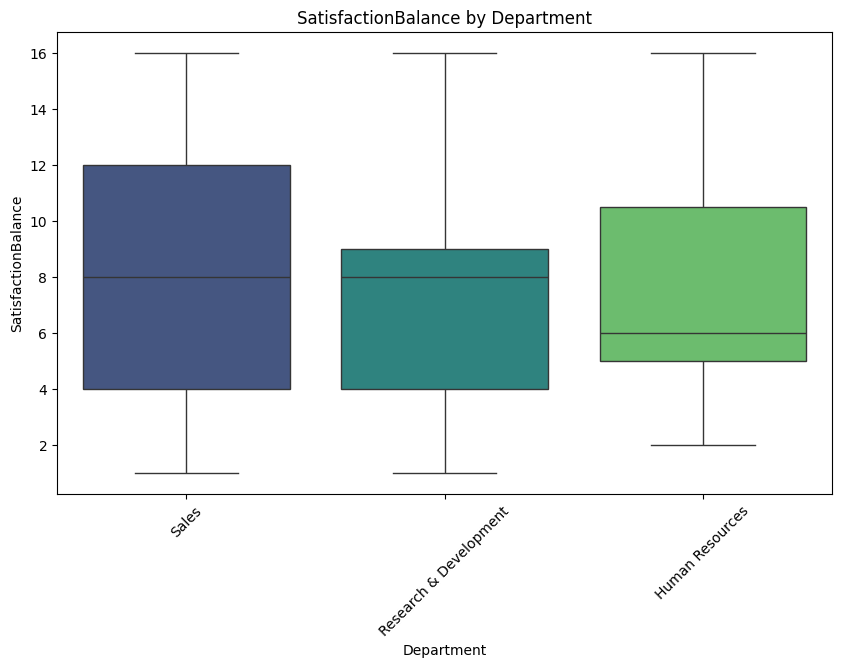

Mean SatisfactionBalance by Department:
Department
Sales                     7.733184
Human Resources           7.444444
Research & Development    7.424558
Name: SatisfactionBalance, dtype: float64


In [35]:
# Analyze SatisfactionBalance by Department
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Department', y='SatisfactionBalance', palette='viridis')
plt.title('SatisfactionBalance by Department')
plt.xlabel('Department')
plt.ylabel('SatisfactionBalance')
plt.xticks(rotation=45)
plt.show()

# Calculate mean SatisfactionBalance for each department
department_means = data.groupby('Department')['SatisfactionBalance'].mean().sort_values(ascending=False)
print("Mean SatisfactionBalance by Department:")
print(department_means)

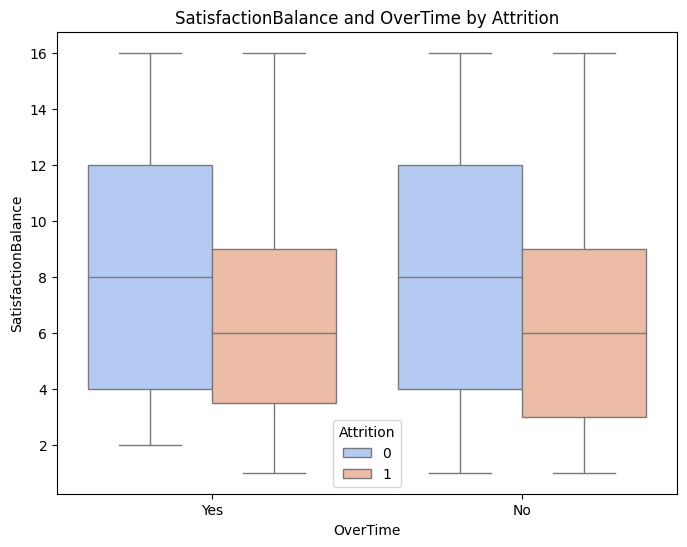

In [36]:
# Explore Interaction: SatisfactionBalance vs OverTime
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='OverTime', y='SatisfactionBalance', hue='Attrition', palette='coolwarm')
plt.title('SatisfactionBalance and OverTime by Attrition')
plt.xlabel('OverTime')
plt.ylabel('SatisfactionBalance')
plt.show()

In [ ]:
# Further Analysis: SatisfactionBalance and OverTime by Attrition
# ---------------------------------------------------------------
# Objective:
# - Investigate how SatisfactionBalance interacts with OverTime and Attrition.
# - Identify trends that highlight high-risk groups for attrition.
#
# Key Insights:
# 1. Employees Working Overtime (OverTime = Yes):
#    - Attrition = 1 (Left): Median SatisfactionBalance is significantly lower (~6) 
#      compared to those who stayed, indicating dissatisfaction amplifies attrition risk.
#    - Attrition = 0 (Stayed): Higher median SatisfactionBalance (~8), reflecting 
#      better retention among satisfied employees.
#
# 2. Employees Not Working Overtime (OverTime = No):
#    - Attrition = 1 (Left): Median SatisfactionBalance is still lower (~6), 
#      but the gap is smaller compared to overtime employees.
#    - Attrition = 0 (Stayed): Higher median (~8), showing that satisfaction drives retention 
#      even without overtime.
#
# General Observations:
# - Overtime amplifies the effects of low satisfaction on attrition.
# - Employees with higher SatisfactionBalance are less likely to leave, regardless of overtime status.
#
# Actionable Recommendations:
# - Focus on improving work-life balance and job satisfaction for employees working overtime.
# - Target teams with high overtime rates and low SatisfactionBalance for retention interventions.

In [ ]:
# Save engineered dataset
data.to_csv('../data/engineered_dataset.csv', index=False)
print('The dataset has been saved as engineered_dataset.csv')